In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [4]:
"""make sure pwd is [dir]/Opdracht_Roel_en_Jur"""
!pwd

/mnt/HDD/Documents/ITvitae/Data_science/Opdracht_Roel_en_Jur


In [5]:
df = pd.read_csv('data/NEIC_global_1973-2014.csv', delimiter=';', header=1, decimal=',', index_col=0)
df.head()

Year  Month  Day  UT-Time  Latit  Longit  Depth  Magnitude
--                                                            
1   1973      1    1     3.77  -9.21  150.63   41.0        5.3
2   1973      1    1     5.37 -15.01 -173.96   33.0        5.0
3   1973      1    1     9.48 -22.16  -65.79  205.0        4.8
4   1973      1    1    11.71 -35.51  -16.21   33.0        6.0
5   1973      1    2     0.89  -9.85  117.43   66.0        5.5

# Waar komen over het algemeen de meeste aardbevingen voor, op het noordelijk of het zuidelijk halfrond?
   

In [6]:
NH = df[df['Latit'] > 0]['Year'].count() # Earthquakes on Northern Hemisphere
NH

105896

In [7]:
ZH = df[df['Latit'] < 0]['Year'].count() # Earthquakes on Southern Hemisphere
ZH

99389

## waar komen de zwaarste voor?

In [8]:
df.groupby(['Latit', 'Longit'])['Magnitude'].max().sort_values(ascending = False).head(5)


Latit    Longit  
 3.300    95.980     9.1
 38.300   142.370    9.0
-36.120  -72.900     8.8
 2.090    97.110     8.6
 2.327    93.063     8.6
Name: Magnitude, dtype: float64

##    Op welke diepte komen de meeste aardbevingen voor?

In [44]:
counts_depth = df['Depth'].value_counts()
# counts_depth.plot('Counts',kind='hist', figsize=(5,10), color='b', grid=True)
counts_depth.head(5)

33.0    46475
10.0    36911
35.0     8145
30.0     3146
40.0     1184
Name: Depth, dtype: int64

## Kun je een verband ontdekken tussen diepte en magnitude?

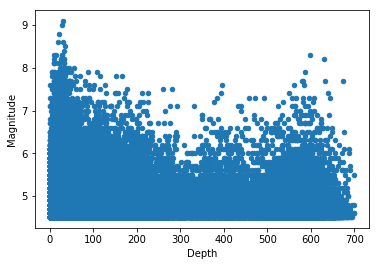

In [28]:
df.plot.scatter('Depth', 'Magnitude')
    

In [29]:
mean_mag = df.groupby('Depth')['Magnitude'].mean()
mean_mag.head(2)

Depth
0.0    5.195481
0.1    4.900000
Name: Magnitude, dtype: float64

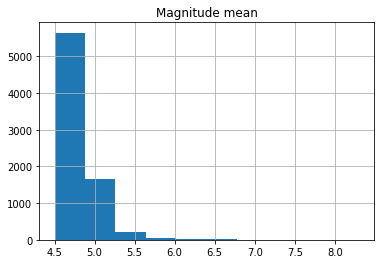

In [30]:
mean_mag.hist()
plt.title('Magnitude mean')
plt.show()

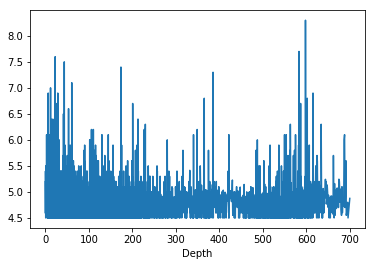

In [31]:
mean_mag.plot() #mean magnitude against depth

In [32]:
#df.boxplot('Magnitude', 'Depth')

  
  # Is het aantal aardbevingen (per maand of per jaar) rond Haiti flink toegenomen sinds 2010?

19°00 N, 72°25 W  (capital)
Area: 18°00 -20°00N (120 nm ~ 200 km)
      71°25  - 73°25  (120 nm ~ 200 km)

In [33]:
Haiti = df[(df['Latit'].between(18.00, 19.00)) & (df['Longit'].between(-73.00, -71.00))]

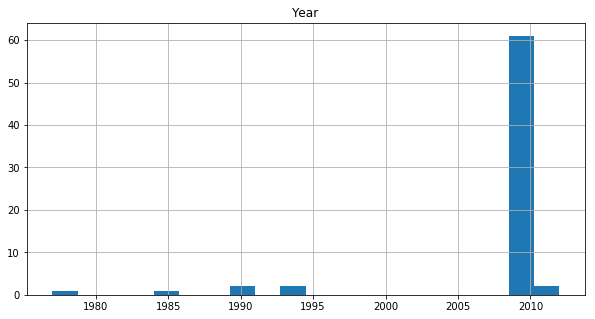

In [34]:
Haiti.hist('Year', bins=20, figsize=(10,5))
plt.show()

In [18]:
Haiti['Year'].value_counts()

2010    61
2012     2
1990     2
1994     1
1993     1
1985     1
1977     1
Name: Year, dtype: int64

Het aantal aardbevingen lijkt niet te zijn toegenomen, alleen het aantal bevingen in 2010 was enorm. 

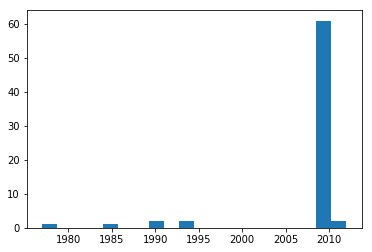

In [19]:
plt.hist(Haiti['Year'], bins=20) # geplot met matplotlib.pyplot
plt.show()


#    En rond Kathmandu (Nepal) sinds 2015?

Kathmandu 27°42′41″N 85°18′31″E
Area: 26° - 28° N
      84° - 86° E (+-50,000 km^2)

In [20]:
"""plt.figure(figsize=(10,2))
plt.title('Aardbevingen Nepal voor 2014')
plt.hist(Nepal_1['Year'], bins = 50, color='green',alpha=0.5)
plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-20-ce83d2016739>, line 4)

In [ ]:
"""Nepal_7314 = df_7314.loc[(df['Latit'].between(26, 28)) & (df_7314['Longit'].between(84, 86))]
Nepal_7314

In [ ]:
df_7314 = pd.read_csv('data/NEIC_global_1973-2014.csv', delimiter=';', header=1, decimal=',', index_col=0)
df_1517 = pd.read_csv('data/query2015_2017.csv') #2015-2017

df_1517['Year'] = pd.DatetimeIndex(df_1517['time']).year #add column Year

In [38]:
Nepal_7314 = df_7314.loc[(df_7314['Latit'].between(26, 28)) & (df_7314['Longit'].between(84, 86))]
Nepal_1517 = df_1517.loc[(df_1517['latitude'].between(26, 28)) & (df_1517['longitude'].between(84, 86))]

Nepal_7314.info()
Nepal_1517.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 11930 to 153063
Data columns (total 8 columns):
Year         18 non-null int64
Month        18 non-null int64
Day          18 non-null int64
UT-Time      18 non-null float64
Latit        18 non-null float64
Longit       18 non-null float64
Depth        18 non-null float64
Magnitude    18 non-null float64
dtypes: float64(5), int64(3)
memory usage: 1.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1985 to 15598
Data columns (total 23 columns):
time               64 non-null object
latitude           64 non-null float64
longitude          64 non-null float64
depth              64 non-null float64
mag                64 non-null float64
magType            64 non-null object
nst                0 non-null float64
gap                64 non-null float64
dmin               64 non-null float64
rms                64 non-null float64
net                64 non-null object
id                 64 non-null object
updated   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 11930 to 153063
Data columns (total 8 columns):
Year         18 non-null int64
Month        18 non-null int64
Day          18 non-null int64
UT-Time      18 non-null float64
Latit        18 non-null float64
Longit       18 non-null float64
Depth        18 non-null float64
Magnitude    18 non-null float64
dtypes: float64(5), int64(3)
memory usage: 1.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1985 to 15598
Data columns (total 23 columns):
time               64 non-null object
latitude           64 non-null float64
longitude          64 non-null float64
depth              64 non-null float64
mag                64 non-null float64
magType            64 non-null object
nst                0 non-null float64
gap                64 non-null float64
dmin               64 non-null float64
rms                64 non-null float64
net                64 non-null object
id                 64 non-null object
updated   

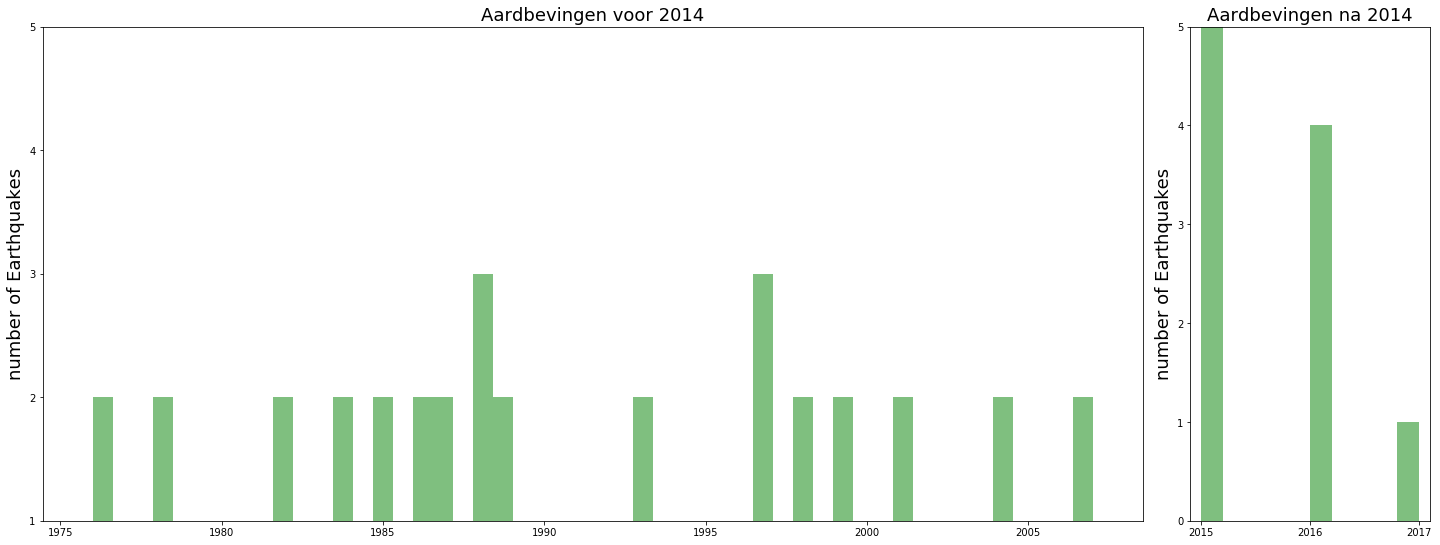

In [37]:
# import dataframes:
df_7314 = pd.read_csv('data/NEIC_global_1973-2014.csv', delimiter=';', header=1, decimal=',', index_col=0) #1973-2014
df_1517 = pd.read_csv('data/query2015_2017.csv') #2015-2017

df_1517['Year'] = pd.DatetimeIndex(df_1517['time']).year.astype('str') #add column Year

#Define Geographic area around: 26° - 28° N 84° - 86° E (+-50,000 km^2 around Kathmandu)
Nepal_7314 = df_7314.loc[(df_7314['Latit'].between(26, 28)) & (df_7314['Longit'].between(84, 86))]
Nepal_1517 = df_1517.loc[(df_1517['latitude'].between(26, 28)) & (df_1517['longitude'].between(84, 86))]

Nepal_7314.info()
Nepal_1517.info()

plt.figure(figsize=(30,20))
# subplot1
ax1 = plt.subplot2grid((2, 6), (1, 0), colspan = 4) #grid geometry + location
ax1.set_ylabel("number of Earthquakes", fontsize=18)
plt.title("Aardbevingen voor 2014", fontsize = 18) 
plt.hist(Nepal_7314['Year'], bins = 50, color='green',alpha=0.5)
plt.yticks(range(5), ['1', '2', '3', '4', '5'])
#subplot2
#ax2.title('Aardbevingen na 2014')
ax2 = plt.subplot2grid((2, 6), (1, 4) , colspan = 1) #grid geometry + location
ax2.set_ylabel("number of Earthquakes", fontsize=18)
plt.title("Aardbevingen na 2014", fontsize = 18) 
plt.hist(Nepal_1517['Year'], bins = 10, color='green',alpha=0.5)
plt.ylim([0,5])
#plt.xticks(range(3), ['2015', '2016', '2017'])

plt.show()